#  Credit Card Data from book "Econometric Analysis"

Este taller tendrá los siguientes objetivos:

1. Identificar las columnas que tienen valores nulos y especificar la cantidad en cada una de las columnas.
2.  Convertir la columna `fecha` en un tipo de objeto específico para fechas.
3. Obtener los años, meses y días que corresponden al valor decimal de la columna `age` (años).
    Ejemplo: https://www.youtube.com/watch?v=E6qIiUWPyuQ
4. Todas las columnas con valores de `yes` y `no` convertirlos en valores booleanos `True` y `False` respectivamente.
5. Verificar gráficamente la existencia de outliers (boxplot).
6. Crear una columna nueva `> one year` que sea `True` si la el valor de la columna `months` superior a `12` y `False` si es lo contrario.
7. Verificar que la columna `id` sea de tipo `str` u `object`.

## Importar librerías

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv('credit_card_data.csv')

In [3]:
data.head()

,id,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,fecha
0,0,yes,0,37.66667,NaN,0.033270,124.983300,yes,no,3.0,54,1,12,16/11-2010
1,1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3.0,34,1,13,19/1-2010
2,2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,NaN,58,1,5,24/6-2012
3,3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0.0,25,1,7,12/11-2011
4,4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2.0,64,1,5,8/11-2010


## Valores nulos 

In [20]:
data.isna().sum()[data.isna().sum() != 0] / len(data) *100

income        26.990144
share         15.011372
dependents    20.015163
dtype: float64

## Convertir la fecha 

In [26]:
data['fecha'] = pd.to_datetime(data['fecha'])

## Extraer años, mes y días

In [29]:
data['age']

0       37.66667
1       33.25000
2       33.66667
3       30.50000
4       32.16667
          ...   
1314    33.58333
1315    23.91667
1316    40.58333
1317    32.83333
1318    48.25000
Name: age, Length: 1319, dtype: float64

In [30]:
data['años'] = data['age'].astype(int)

In [31]:
data.head(3)

,id,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,fecha,años
0,0,yes,0,37.66667,NaN,0.033270,124.983300,yes,no,3.0,54,1,12,2010-11-16,37
1,1,yes,0,33.25000,2.42,0.005217,9.854167,no,no,3.0,34,1,13,2010-01-19,33
2,2,yes,0,33.66667,4.50,0.004156,15.000000,yes,no,NaN,58,1,5,2012-06-24,33


In [33]:
1 año - 12 meses
0.66667 años - ?

SyntaxError: invalid syntax (<ipython-input-33-e0aaaa9419e1>, line 1)

In [36]:
meses = (data['age'] - data['años']) * 12
meses

0        8.00004
1        3.00000
2        8.00004
3        6.00000
4        2.00004
          ...   
1314     6.99996
1315    11.00004
1316     6.99996
1317     9.99996
1318     3.00000
Length: 1319, dtype: float64

In [37]:
data['meses'] = meses.astype(int)

In [38]:
data.head(3)

,id,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,fecha,años,meses
0,0,yes,0,37.66667,NaN,0.033270,124.983300,yes,no,3.0,54,1,12,2010-11-16,37,8
1,1,yes,0,33.25000,2.42,0.005217,9.854167,no,no,3.0,34,1,13,2010-01-19,33,3
2,2,yes,0,33.66667,4.50,0.004156,15.000000,yes,no,NaN,58,1,5,2012-06-24,33,8


In [39]:
1 mes - 30 días
.00004 meses - ? días

SyntaxError: invalid syntax (<ipython-input-39-567197cc9ce6>, line 1)

In [48]:
data['días'] = round((meses - data['meses']) * 30)

In [54]:
data.tail(2)

,id,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,fecha,años,meses,días
1317,1317,yes,0,32.83333,3.7,0.008999,26.99667,no,yes,0.0,60,1,7,2010-04-03,32,9,30.0
1318,1318,yes,0,48.25000,NaN,NaN,344.15750,yes,no,2.0,2,1,0,2010-02-23,48,3,0.0


In [55]:
meses

0        8.00004
1        3.00000
2        8.00004
3        6.00000
4        2.00004
          ...   
1314     6.99996
1315    11.00004
1316     6.99996
1317     9.99996
1318     3.00000
Length: 1319, dtype: float64

In [81]:
def dias_detalle(x):
    x_int = int(x)
    if x_int in (2,4,6,8,10,12):
        return round((x-x_int) * 30)
    else:
        return round((x-x_int) * 31)

In [82]:
data['dias_detalle'] = meses.apply(dias_detalle)

In [83]:
data.head()

,id,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,fecha,dias_detalle
0,0,yes,0,37.66667,NaN,0.033270,124.983300,yes,no,3.0,54,1,12,16/11-2010,0
1,1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3.0,34,1,13,19/1-2010,0
2,2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,NaN,58,1,5,24/6-2012,0
3,3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0.0,25,1,7,12/11-2011,0
4,4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2.0,64,1,5,8/11-2010,0


## Replace 'yes' -> True

In [88]:
data.replace('no',False, inplace=True)

In [89]:
data.replace('yes', True,inplace=True)

In [85]:
def map_yes(x):
    if x == 'yes':
        return True
    else:
        return False

In [86]:
data['card'] = data['card'].apply(map_yes)

In [91]:
data['card'] = data['card'].apply(lambda x : True if x == 'yes' else False)

In [90]:
data.head()

,id,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,fecha,dias_detalle
0,0,True,0,37.66667,NaN,0.033270,124.983300,True,False,3.0,54,1,12,16/11-2010,0
1,1,True,0,33.25000,2.4200,0.005217,9.854167,False,False,3.0,34,1,13,19/1-2010,0
2,2,True,0,33.66667,4.5000,0.004156,15.000000,True,False,NaN,58,1,5,24/6-2012,0
3,3,True,0,30.50000,2.5400,0.065214,137.869200,False,False,0.0,25,1,7,12/11-2011,0
4,4,True,0,32.16667,9.7867,0.067051,546.503300,True,False,2.0,64,1,5,8/11-2010,0


## Boxplot

In [94]:
columns = ['age', 'expenditure', 'share', 'months']

<AxesSubplot:>

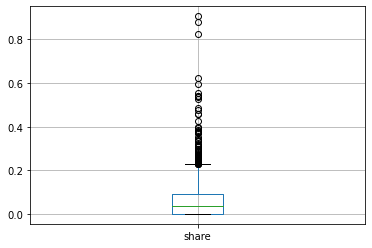

In [97]:
data.boxplot('share')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

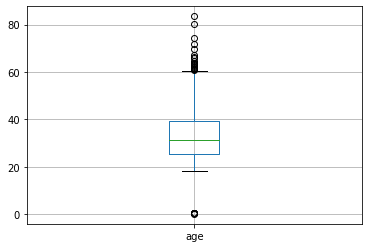

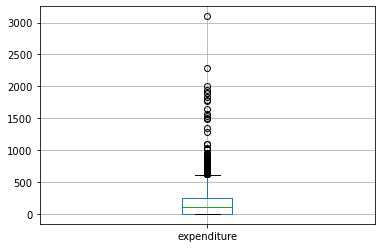

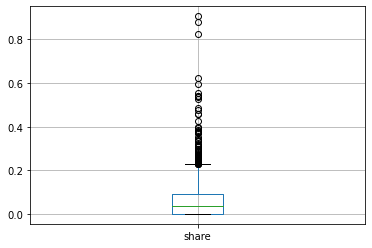

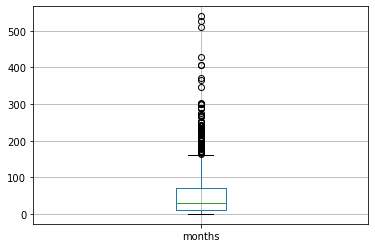

In [102]:
for col in columns:
    plt.figure()
    ax = data.boxplot(col)

In [108]:
import seaborn as sns
sns.set_style('darkgrid')

<AxesSubplot:xlabel='expenditure'>

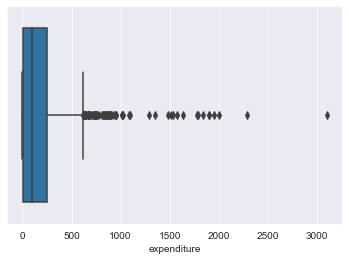

In [110]:
sns.boxplot(data=data, x='expenditure')

<AxesSubplot:>

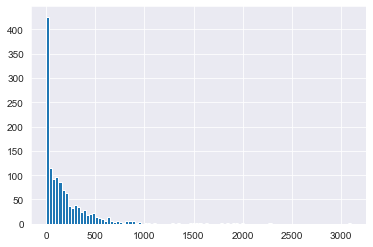

In [113]:
data['expenditure'].hist(bins=100)

In [114]:
data['> one year'] = data['months'] > 12

In [117]:
data.head()

,id,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,fecha,dias_detalle,> one year
0,0,False,0,37.66667,NaN,0.033270,124.983300,True,False,3.0,54,1,12,16/11-2010,0,True
1,1,False,0,33.25000,2.4200,0.005217,9.854167,False,False,3.0,34,1,13,19/1-2010,0,True
2,2,False,0,33.66667,4.5000,0.004156,15.000000,True,False,NaN,58,1,5,24/6-2012,0,True
3,3,False,0,30.50000,2.5400,0.065214,137.869200,False,False,0.0,25,1,7,12/11-2011,0,True
4,4,False,0,32.16667,9.7867,0.067051,546.503300,True,False,2.0,64,1,5,8/11-2010,0,True


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1319 non-null   int64  
 1   card          1319 non-null   bool   
 2   reports       1319 non-null   int64  
 3   age           1319 non-null   float64
 4   income        963 non-null    float64
 5   share         1121 non-null   float64
 6   expenditure   1319 non-null   float64
 7   owner         1319 non-null   bool   
 8   selfemp       1319 non-null   bool   
 9   dependents    1055 non-null   float64
 10  months        1319 non-null   int64  
 11  majorcards    1319 non-null   int64  
 12  active        1319 non-null   int64  
 13  fecha         1319 non-null   object 
 14  dias_detalle  1319 non-null   int64  
 15  > one year    1319 non-null   bool   
dtypes: bool(4), float64(5), int64(6), object(1)
memory usage: 128.9+ KB


In [121]:
data['id'].dtype

dtype('int64')

In [122]:
data['id'].astype(str)

0          0
1          1
2          2
3          3
4          4
        ... 
1314    1314
1315    1315
1316    1316
1317    1317
1318    1318
Name: id, Length: 1319, dtype: object

In [123]:
37.0666

37.0666